MovieWriter imagemagick unavailable; using Pillow instead.


This graph is a intentionally left blank. We will use it to make animation in the later part of the program


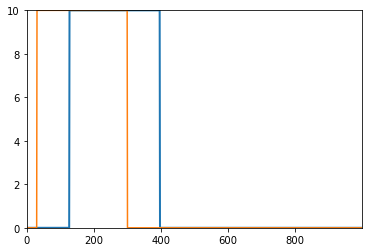

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();


ax.set_xlim(( 0, 1000));
ax.set_ylim((-0, 10));
line, = ax.plot([], [], lw=2);

def sett(x1,x2,y1,y2):
    ax.set_xlim(( x1,x2));
    ax.set_ylim((y1, y2));
    line, = ax.plot([], [], lw=2);

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i,rho,xx,step):
    x = xx
    rr=step*i
    y = rho[rr]
    sett(xx.min(),xx.max(),rho[rr].min(),rho[rr].max())
    line.set_data(x, y)
    return (line,)
print("This graph is a intentionally left blank. We will use it to make animation in the later part of the program")




spacegrid=1000
width=1.0
xx=np.arange(spacegrid)
timesteps=1000
simulationtime=1.0
velocity=1.0
dt=simulationtime/timesteps
dx=width/spacegrid
rho=np.zeros((timesteps,spacegrid),float)
rho[0,30:300]=10
veolcitygrid=velocity*np.ones(spacegrid)







timesteps=1000
dt=simulationtime/timesteps
rhoFx=np.zeros((timesteps,spacegrid+4),float)
flux=np.zeros((spacegrid+2),float)
rhoFx[0,30:300]=10
veolcitygrid=velocity*np.ones(spacegrid)
plt.plot(rhoFx[0])
for t in range(timesteps-1):
    flux=(0.5*(velocity*rhoFx[t,1:]+velocity*rhoFx[t,:-1])-0.5*abs(velocity)*(rhoFx[t,1:]-rhoFx[t,:-1]))*dt
    rhoFx[t+1,1:-1]=rhoFx[t,1:-1]-(flux[1:]-flux[:-1])/dx
anim = animation.FuncAnimation(fig, animate, fargs=(rhoFx[:,2:-2],xx,1,), init_func=init,frames=100, interval=20, blit=True)
anim.save('explicitflux233.gif', writer='imagemagick')
Image(url='explicitflux233.gif')